# This body of work will use Machine Learning techniques to forecast stock returns.

###I will use Machine Learning models to forecast Apples share price movments by creating a binary classification problem. I will take the log returns for the share price over the sample period, before changing postive and negative daily prices moves to 1 and 0 respectively. I will then use a range of ML modesl to assess their ability at capturing the price movements of the test data. Before attempting to forecast 5 days into the future with the best performing model. I will then repeat this process on a Deep Neural Network. 

In [115]:
#import libraries 
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import pandas as pd
import seaborn as sns
import itertools
import sklearn
 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Dense
import warnings
warnings.filterwarnings('ignore')

In [116]:
# link to yahoo finance for Apple historical data - 03/01/2000 - 23/04/2021
# https://uk.finance.yahoo.com/quote/AAPL/history?p=AAPL

In [117]:
#import file (data is downloaded from yahoo finance website, it is daily data for apple stock from 03/01/2000 until the day this piece is produced.)
from google.colab import files
uploaded = files.upload()

Saving AAPL (3).csv to AAPL (3) (2).csv


In [119]:
#import data (Apple daily stocks returns for yahoo finance)
df = pd.read_csv('/content/AAPL (3).csv')
df.head(n=10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.860883,535796800
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.788302,512377600
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.799837,778321600
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.730621,767972800
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.765229,460734400
5,2000-01-10,0.910714,0.912946,0.845982,0.872768,0.751771,505064000
6,2000-01-11,0.856585,0.887277,0.808036,0.828125,0.713317,441548800
7,2000-01-12,0.848214,0.852679,0.772321,0.778460,0.670537,976068800
8,2000-01-13,0.843610,0.881696,0.825893,0.863839,0.744079,1032684800
9,2000-01-14,0.892857,0.912946,0.887277,0.896763,0.772439,390376000


In [120]:
#add column of log returns for Apple stock using closing prices 
df['log return'] = np.log(df.Close) - np.log(df.Close.shift(1))
df

,Date,Open,High,Low,Close,Adj Close,Volume,log return
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.860883,535796800,NaN
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.788302,512377600,-0.088077
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.799837,778321600,0.014527
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.730621,767972800,-0.090514
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.765229,460734400,0.046281
...,...,...,...,...,...,...,...,...
5356,2021-04-19,133.509995,135.470001,133.339996,134.839996,134.839996,94264200,0.005056
5357,2021-04-20,135.020004,135.529999,131.809998,133.110001,133.110001,94812300,-0.012913
5358,2021-04-21,132.360001,133.750000,131.300003,133.500000,133.500000,68847100,0.002926
5359,2021-04-22,133.039993,134.149994,131.410004,131.940002,131.940002,84566500,-0.011754


In [121]:
#change values of target variable to 1 or 0, 0 for negtaive daily price move, 1 for positive daily price move 
df['log return'] = [0 if i <=0 else 1 for i in df['log return']]
df

,Date,Open,High,Low,Close,Adj Close,Volume,log return
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.860883,535796800,1
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.788302,512377600,0
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.799837,778321600,1
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.730621,767972800,0
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.765229,460734400,1
...,...,...,...,...,...,...,...,...
5356,2021-04-19,133.509995,135.470001,133.339996,134.839996,134.839996,94264200,1
5357,2021-04-20,135.020004,135.529999,131.809998,133.110001,133.110001,94812300,0
5358,2021-04-21,132.360001,133.750000,131.300003,133.500000,133.500000,68847100,1
5359,2021-04-22,133.039993,134.149994,131.410004,131.940002,131.940002,84566500,0


In [122]:
#check nan's
df.isna().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
log return    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48ebdc6e50>,
      dtype=object)

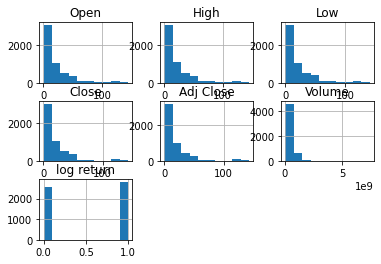

In [123]:
# plot distribution of numerical data in df and observe (tragey varibale is fairly balanced which is important, explanatory variables are negatively skewed which is expected for financial data, we general ignore this)
df.hist()

In [124]:
## check types are sufficient
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Adj Close     float64
Volume          int64
log return      int64
dtype: object

In [125]:
#drop date column
df = df.drop(["Date"], axis=1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,log return
0,0.936384,1.004464,0.907924,0.999442,0.860883,535796800,1
1,0.966518,0.987723,0.903460,0.915179,0.788302,512377600,0
2,0.926339,0.987165,0.919643,0.928571,0.799837,778321600,1
3,0.947545,0.955357,0.848214,0.848214,0.730621,767972800,0
4,0.861607,0.901786,0.852679,0.888393,0.765229,460734400,1


In [126]:
## extract features 
features = df.columns
print(features)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'log return'], dtype='object')


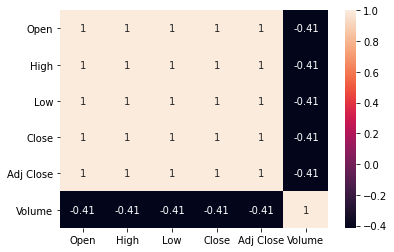

In [127]:
df1 = pd.DataFrame(df,columns=['Open','High','Low', 'Close', 'Adj Close', 'Volume'])

corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## As expected there is perfect correlation within the explanatory variables. Therefore, 'Close' will be used for the ML models to prevent multicollinearity affecting results. All explanatory varaibles will be used in the DNN due to how over paramaterised it is. 

In [128]:
## Perform feature scaling to standardize remaining numerical values 
#import standard scaler
from sklearn.preprocessing import StandardScaler

#Perform feature scaling 
standardScaler = StandardScaler()
columns_for_ft_scaling = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

#apply the fearure scaling operation on the datset using fit_transform() method
df[columns_for_ft_scaling] = standardScaler.fit_transform(df[columns_for_ft_scaling])
df.head(-1)

,Open,High,Low,Close,Adj Close,Volume,log return
0,-0.715977,-0.713080,-0.717784,-0.713739,-0.684642,0.244283,1
1,-0.714864,-0.713691,-0.717951,-0.716854,-0.687338,0.184301,0
2,-0.716349,-0.713712,-0.717345,-0.716359,-0.686909,0.865443,1
3,-0.715565,-0.714874,-0.720019,-0.719328,-0.689481,0.838937,0
4,-0.718741,-0.716831,-0.719852,-0.717843,-0.688195,0.052032,1
...,...,...,...,...,...,...,...
5355,4.213300,4.169644,4.237367,4.207450,4.267425,-0.910772,0
5356,4.184100,4.198868,4.239613,4.232581,4.292686,-0.886580,1
5357,4.239912,4.201059,4.182339,4.168646,4.228417,-0.885176,0
5358,4.141595,4.136037,4.163248,4.183059,4.242905,-0.951679,1


In [133]:
#set x and y variables 
x = np.array(df[['Close']])
y = np.array(df['log return'])

In [134]:
## split into training and test data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 42, shuffle=False)

### Will now train and test some ML models

In [136]:
#Fit logistic regression model 
logmodel = LogisticRegression(random_state=42)
logmodel.fit(x_train,y_train)

#predict the results
predict_lm = logmodel.predict(x_test)

#Calculate accuracy 
log_model_accuracy = round(metrics.accuracy_score(y_test, predict_lm) * 100, 2)
print("Logmodel accuracy:", log_model_accuracy)

Logmodel accuracy: 54.93


In [137]:
#Fit a Support Vector Machine Model
svm_model = SVC(kernel = 'linear', random_state = 42, probability = True)
svm_model.fit(x_train,y_train)

#predict results
svm_predict = svm_model.predict(x_test)

#Calculate accuracy 
svm_accuracy = round(metrics.accuracy_score(y_test, svm_predict) * 100, 2)
print(" SVC model accuracy:", svm_accuracy)

 SVC model accuracy: 54.93


In [138]:
#Fit K-Nearest Neighbour model 
kmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p=2 represents Euclidean distance 
kmodel.fit(x_train,y_train)

#Predict results
k_predict = kmodel.predict(x_test)

#Calcualte accuracy of the model 
k_accuracy = round(metrics.accuracy_score(y_test, k_predict) * 100, 2)
print("K-Nearest Neighbours model:", k_accuracy) 

K-Nearest Neighbours model: 55.68


In [139]:
#Fit Decesion Tree model
dtmodel = DecisionTreeClassifier(criterion = "gini", random_state = 42)
dtmodel.fit(x_train,y_train)

#Predict results
dt_predict = dtmodel.predict(x_test)

#Calculate accuracy
dt_accuracy = round(metrics.accuracy_score(y_test, dt_predict) * 100, 2)
print("Decesion Tree model accuracy:", dt_accuracy)

Decesion Tree model accuracy: 55.31


In [140]:
##Fit random forrest
rf_classifier = RandomForestClassifier(random_state = 42)
rf_classifier.fit(x_train,y_train)

#predict results
rf_predict = rf_classifier.predict(x_test)

#calculate accuracy 
rf_accuracy = round(metrics.accuracy_score(y_test, rf_predict) * 100, 2)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 55.87


In [141]:

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(x_train,y_train)

gb_predict = gb_clf.predict(x_test)

gb_accuracy = round(metrics.accuracy_score(y_test, gb_predict) * 100, 2)
print("GradientBoostingClassifier Accuracy:", gb_accuracy)

GradientBoostingClassifier Accuracy: 54.38


In [142]:
#Create table of accuracies 
model_comparison = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Support Vector Machine', 'K_Nearest Neighbours', 'Decesion Tree', 'Random Forest', 'GradientBoostingClassifier'],
    'Score' : [log_model_accuracy, svm_accuracy, k_accuracy, dt_accuracy, rf_accuracy, gb_accuracy]
})
Model_comparison_df = model_comparison.sort_values(by='Score', ascending=False)
Model_comparison_df = Model_comparison_df.set_index('Score')
Model_comparison_df.reset_index()

,Score,Model
0,55.87,Random Forest
1,55.68,K_Nearest Neighbours
2,55.31,Decesion Tree
3,54.93,Logistic Regression
4,54.93,Support Vector Machine
5,54.38,GradientBoostingClassifier


[[ 31 211]
 [ 26 269]]


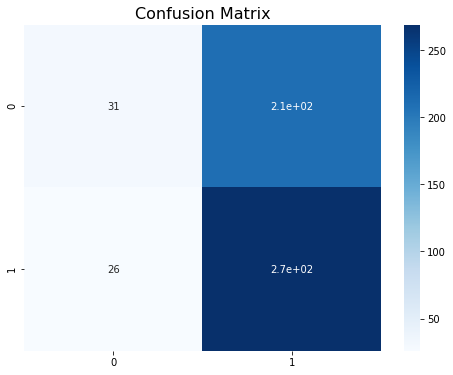

In [143]:
#Generate confusion matrix for model evauluation, will use model with the highest accuracy 

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, rf_predict)
print(cm)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues')

## As can be seen by the confusion matrix our best performing model, in terms of accuracy, is poor. The model is predicting that the price will move higher more often than it is, sucessfully capturing 269 True Positives, but miss prediciting 211 False positives. The model is also unsucessful at predicting downturns with 31 True Negatives and 26 False positives. I believe accuracay for this business problem is the most suitable metric. 

### I will now forecast 5 days of positive/negative daily stock returns for Apple stock 

In [144]:
#Use make_blobs to generate values with a standard normal dis. 
#Predicitions appear consistant but having used different sample periods the predicitions do not chanage. likely biased. 

#new instances where we do not know the answer
from sklearn.datasets import make_blobs
Xnew, _ = make_blobs(n_samples=5, centers=5, n_features=1, random_state=1)
# make a prediction
ynew = rf_classifier.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("Predicted=%s" % (ynew[i]))

Predicted=0
Predicted=0
Predicted=1
Predicted=0
Predicted=0


In [145]:
#forecast with log model as above 
from sklearn.datasets import make_blobs
Xnew, _ = make_blobs(n_samples=5, centers=5, n_features=1, random_state=1)
x_new = np.concatenate((x_test, Xnew))
ynew = logmodel.predict(x_new)
predictions = ynew[-5:]
for i in range(len(predictions)):
    print("Prediction = ", predictions[i])

Prediction =  0
Prediction =  0
Prediction =  1
Prediction =  0
Prediction =  0


In [146]:
#Forecasting with rf and random.choice 
#Use random choice to select 5 random rows of observations and add this onto the end of the time series test data to forecast 5 additional predicitions. 
#Results are very inconsistent 
xnew = np.random.choice(len(x_train), 5, replace=False)
X_new = x_train[xnew]
x_new = np.concatenate((x_test, X_new))
ynew = rf_classifier.predict(x_new)
predictions = ynew[-5:]
for i in range(len(predictions)):
    print("Prediction = ", predictions[i])

Prediction =  0
Prediction =  0
Prediction =  1
Prediction =  1
Prediction =  1


In [147]:
#forecast using randit function to generate a random integer and effectively fit a random slice of the test data with our model plus number of observations.   
#stable but bias results for this data set.
from numpy import random

random_number = random.randint(500)
n_obs = 5
random_set = x_test[random_number:random_number+n_obs]
x_new = np.concatenate((x_test, random_set))

ynew = rf_classifier.predict(x_new)
predictions = ynew[-5:]
for i in range(len(predictions)):
    print("Prediction = ", predictions[i])

Prediction =  1
Prediction =  1
Prediction =  0
Prediction =  0
Prediction =  0


# I will now form a DNN for predicting positive/negative returns 

In [148]:
#reload data  
df = pd.read_csv('/content/AAPL (3).csv') #load
df['log return'] = np.log(df.Close) - np.log(df.Close.shift(1)) #calculate log returns and add col
df['log return'] = [0 if i <=0 else 1 for i in df['log return']] #changes log returns to 0 or 1 for target
df = df.drop(["Date"], axis=1) #drop date col

df[columns_for_ft_scaling] = standardScaler.fit_transform(df[columns_for_ft_scaling]) #standard scale (I opted for this as model performed very badly with normalised data)

x = np.array(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]) #set x
y = np.array(df['log return']) #set y 


In [149]:
## split into training and test data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, shuffle=True)

In [150]:
#build model by using keras sequential 
model = keras.Sequential()
model.add(layers.Dense(1024, input_dim=6, activation='relu')) #add first dense layer with 1024 nodes, relu activation function 
model.add(layers.Dense(512, activation='relu')) #add second dense layer with 512 nodes, relu activation function 
model.add(layers.Dense(256, activation='relu')) #third with 256 nodes, relu
model.add(layers.Dense(128, activation='relu')) #fourth, relu 
model.add(layers.Dense(1, activation='sigmoid')) #output layer, sigmoid 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              7168      
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 696,321
Trainable params: 696,321
Non-trainable params: 0
_________________________________________________________________


In [151]:
#compile model, set loss function, optiser and metric
from keras import optimizers
optimizer = optimizers.Adam(lr=1e-05)
model.compile(loss='binary_crossentropy', 
              optimizer=optimizer,
              metrics=['acc'])

In [152]:
#make tensor flow run eagerly instead of graph function 
tf.config.run_functions_eagerly(True)

In [153]:
#fit model to training data 
model.fit(x_train, y_train, epochs=500, batch_size=128, validation_data=(x_test,y_test))

Epoch 1/500
34/34 [==============================] - 1s 16ms/step - loss: 0.6929 - acc: 0.5143 - val_loss: 0.6928 - val_acc: 0.5163
Epoch 2/500
34/34 [==============================] - 1s 15ms/step - loss: 0.6920 - acc: 0.5340 - val_loss: 0.6927 - val_acc: 0.5172
Epoch 3/500
34/34 [==============================] - 1s 15ms/step - loss: 0.6918 - acc: 0.5217 - val_loss: 0.6928 - val_acc: 0.5172
Epoch 4/500
34/34 [==============================] - 1s 16ms/step - loss: 0.6928 - acc: 0.5126 - val_loss: 0.6924 - val_acc: 0.5191
Epoch 5/500
34/34 [==============================] - 1s 15ms/step - loss: 0.6913 - acc: 0.5284 - val_loss: 0.6924 - val_acc: 0.5182
Epoch 6/500
34/34 [==============================] - 1s 15ms/step - loss: 0.6912 - acc: 0.5270 - val_loss: 0.6922 - val_acc: 0.5182
Epoch 7/500
34/34 [==============================] - 1s 15ms/step - loss: 0.6911 - acc: 0.5301 - val_loss: 0.6922 - val_acc: 0.5182
Epoch 8/500
34/34 [==============================] - 1s 15ms/step - loss: 0.

In [154]:
dnn_predict = model.predict(x_test)
dnn_predict = round(pd.DataFrame((dnn_predict)))

[[265 255]
 [ 73 480]]


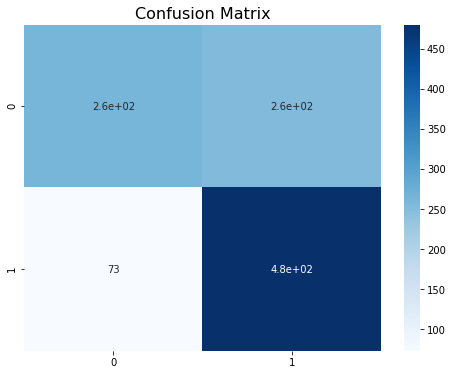

In [155]:
#confusion matrix for DNN 
cm_rf = confusion_matrix(y_test, dnn_predict)
print(cm_rf)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm_rf, annot=True, cmap='Blues')


## The confusion matrix demonstartes that the DNN does produce a more suitable model which achieves slightly more accuracy and more balanced predictions. Overall, the DNN is more efficent than the other ML models.

In [156]:
#Forecast 5 obs 
Xnew, _ = make_blobs(n_samples=5, centers=5, n_features=6, random_state=1)
x_new = np.concatenate((x_test, Xnew))
ynew = model.predict(x_new)
predictions = ynew[-5:]
for i in range(len(predictions)):
    print("Prediction = ", predictions[i])

Prediction =  [1.]
Prediction =  [0.]
Prediction =  [1.]
Prediction =  [1.]
Prediction =  [0.]


##It can be seen that none of the models can forcast/predict Apple's share price with a high level of accuracy. The DNN was potentially too complex for the problem presented to it, although I would have liked to explore a GRID search and improving performance with different optimizers, cost functions etc. It would have been very interesting to present a DNN or even a CNN with a more expansive dataset. The forecasts are basic and likley unreliable but it would be interesting to see how they fair in reality.  